In [112]:
# HI There, Just relax and enjoy the show :)

# Your task in this challenge is to predict the cost of the houses in particular blocks 
# based on different sociodemographic attributes 
# (It's up to you to decide which attributes you want to use, you can include location information or not)

# You can use any of the libraries that you want
# These libraries below are just a recommendation


# CHALLENGE 1: If some of those libraries are  not available on your system,
# you would need to resolve the dependencies as part of this challenge

import numpy as np
import matplotlib.pyplot as plt 

import pandas as pd  
import seaborn as sns 
from sklearn.datasets import fetch_california_housing

#Due to Anaconda all libraries are available for my system.

%matplotlib inline

In [113]:
# We will work with this dataset in the next steps
# CHALLENGE 2: Load the data ( it will get harder :) )
df = fetch_california_housing(as_frame=True)["frame"]
df.head()

# ---- Attribute Information ----:
# MedInc:  median income in block
# HouseAge:  median house age in block
# AveRooms:  average number of rooms
# AveBedrms:  average number of bedrooms
# Population:  block population
# AveOccup:  average house occupancy
# Latitude:  house block latitude
# Longitude:  house block longitude
# MedHouseVal: the median house value for California districts (!! our target variable !!)

# This dataset was derived from the 1990 U.S. census, using one row per census
# block group. A block group is the smallest geographical unit for which the U.S.
# Census Bureau publishes sample data (a block group typically has a population
# of 600 to 3,000 people).


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


 
The indizes of the rows indicate the particular block group, it's exact geographical location is unknown fromt he data alone.
 


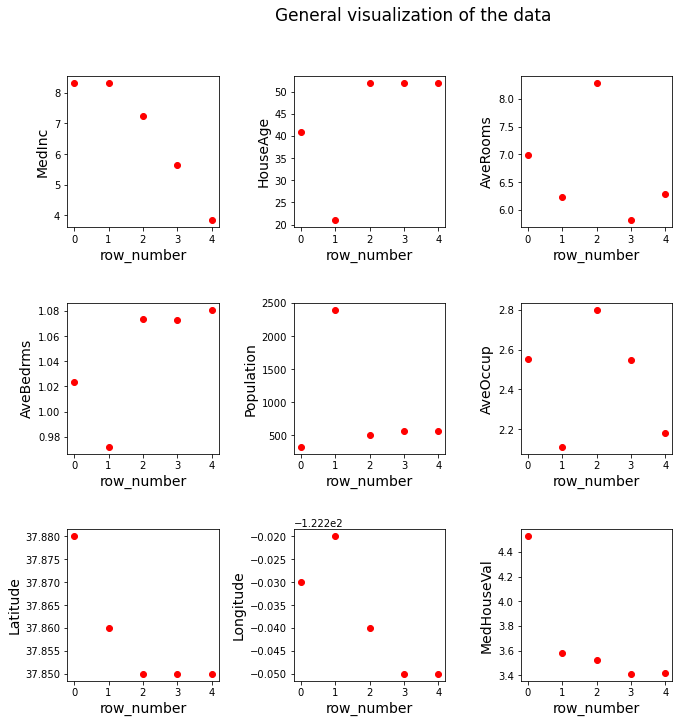

 
 
 
Hei


In [114]:
# CHALLENGE 3: Explorative Data Analysis and Data Cleaning
# Examine the data for outliers, missing values and try to apply some
# cleaning on the data. Provide visualization if possible
# Do you see any patterns, correlations in the data?
# Please describe your observations

print(" ")
print("The indizes of the rows indicate the particular block group, it's exact geographical location is unknown fromt he data alone.")
print(" ")

a = df.head()

col_1 = a.loc[0:4, 'MedInc']
col_1 = np.array([i for i in col_1]) #gaining the individual columns and changing them into arrays (personally more comfortable with)

col_2 = a.loc[0:4, 'HouseAge']
col_2 = np.array([i for i in col_2])

col_3 = a.loc[0:4, 'AveRooms']
col_3 = np.array([i for i in col_3])

col_4 = a.loc[0:4, 'AveBedrms']
col_4 = np.array([i for i in col_4])

col_5 = a.loc[0:4, 'Population']
col_5 = np.array([i for i in col_5])

col_6 = a.loc[0:4, 'AveOccup']
col_6 = np.array([i for i in col_6])

col_7 = a.loc[0:4, 'Latitude']
col_7 = np.array([i for i in col_7])

col_8 = a.loc[0:4, 'Longitude']
col_8 = np.array([i for i in col_8])

col_9 = a.loc[0:4, 'MedHouseVal']
col_9 = np.array([i for i in col_9])


row_num = np.array([0, 1, 2, 3, 4])


fig, ((ax1, ax2, ax3), (ax4, ax5, ax6), (ax7, ax8, ax9)) = plt.subplots(3, 3, figsize=(12,12))
fig.suptitle('General visualization of the data', fontsize=17)
ax1.plot(row_num, col_1, 'ro', label='MedInc')
ax1.set_xlabel("row_number", fontsize=14)
ax1.set_ylabel("MedInc", fontsize=14)
ax2.plot(row_num, col_2, 'ro', label='HouseAge')
ax2.set_xlabel("row_number", fontsize=14)
ax2.set_ylabel("HouseAge", fontsize=14)
ax3.plot(row_num, col_3, 'ro', label='AveRooms')
ax3.set_xlabel("row_number", fontsize=14)
ax3.set_ylabel("AveRooms", fontsize=14)
ax4.plot(row_num, col_4, 'ro', label='AveBedrms')
ax4.set_xlabel("row_number", fontsize=14)
ax4.set_ylabel("AveBedrms", fontsize=14)
ax5.plot(row_num, col_5, 'ro', label='Population')
ax5.set_xlabel("row_number", fontsize=14)
ax5.set_ylabel("Population", fontsize=14)
ax6.plot(row_num, col_6, 'ro', label='AveOccup')
ax6.set_xlabel("row_number", fontsize=14)
ax6.set_ylabel("AveOccup", fontsize=14)
ax7.plot(row_num, col_7, 'ro', label='Latitude')
ax7.set_xlabel("row_number", fontsize=14)
ax7.set_ylabel("Latitude", fontsize=14)
ax8.plot(row_num, col_8, 'ro', label='Longitude')
ax8.set_xlabel("row_number", fontsize=14)
ax8.set_ylabel("Longitude", fontsize=14)
ax9.plot(row_num, col_9, 'ro', label='MedHouseVal')
ax9.set_xlabel("row_number", fontsize=14)
ax9.set_ylabel("MedHouseVal", fontsize=14)

plt.subplots_adjust(left=0.1,
                    bottom=0.2, 
                    right=0.8, 
                    top=0.9, 
                    wspace=0.5, 
                    hspace=0.5)
plt.show()

print(" ")
print(" ")
print(" ")
print("Hei")


In [115]:
#Regarding outliers:

#Particularily noticable outliers to the naked eye would be the second element of the Population column and the second element of the HouseAge column.

#There are a few methods to eliminate outliers from your data. We could simply omit the outlier data point if it showcases a huge visual difference to the rest of the data point.
#However with only so few values we shouldn't rely on that method. Furthermore it's not the best way to rely on the naked eye alone.

#A better way would be to approximate the data to a normal distribution where it's expectation value would the average of the column.

np.mean(col_5)

def outlier_correction(x):
    new = []
    #print(np.mean(x))
    #print(np.std(x))
    for i in x:
        if not (i < np.mean(x)-1*np.std(x) or i > np.mean(x)+1*np.std(x)):
            new.append(i)

    new = np.array([j for j in new])
    return new

#Due to the outlier the standard deviation will also be quite large. Therefore we should find our boundaries in which our data points should fall into.
#It's important to use the same correction method for all data column. If we want to eliminate data points which fall up and below the mean +- sigma,
#we should be inclined to use the same for every other column.

#We omit the data points which do not fall into the above specified region of the if statement.

#We should also not use this for data sets which show an gradual ascending or descending trajectory
#and for data sets which show a complete non-uniform distribution


col_2_corr = outlier_correction(col_2) 
print(col_2_corr)
col_3_corr = outlier_correction(col_3) 
print(col_3_corr)
col_4_corr = outlier_correction(col_4) 
print(col_4_corr)
col_5_corr = outlier_correction(col_5) #Here the second data value has been eliminated from the Population data set.
print(col_5_corr)

#Another possible way is to instead of the median a median absolute deviation. However one needs to be careful for the
#median value to not fall into the outlier itself.

#This is just one simple way for removing outliers and careful examination of the boundaries and background information should be included to determine more accurate ways to remove outliers.
#Pandas also provides the correct_outliers function if we specifiy an exact treshold which my data points are not allowed to pass.
    


[41. 52. 52. 52.]
[6.98412698 6.23813708 6.28185328]
[1.02380952 1.07344633 1.07305936 1.08108108]
[322. 496. 558. 565.]


In [116]:
#Regarding correlations and patterns:

#From the visual representations of the data columns the most noticable correlation (at least to me) would be the
#ascending trajectories of the MedInc, Latitude and MedHouseVal data sets. 
#The Latitude graph is a bit misleading though since the absolute data stays almost constant (we should probably set different limits on the y-axis to showcase this constant trend)

#It's also important to note that for the MedInc and MedHouseVal data columns showcase only the median values
#We have no information on any possible changes for the outer and lower boundaries for this particular block group

#We could argue that a decrease of median income would be soon accomodated by a reduction in house price to make housing more affordable for the population.

#Another case could be made about the correlation of the second element in the house occupance data set and the second element of the HouseAge data set.
#The average number of people living in a house decreases with house age. Tough once again we don't have information about the data set this house age median was derived from.

[8.3014 5.6431 8.3252]
[3.585 3.413 4.526]

The slope of the calibration curve equals ( 0.242960 +- 0.092002 )
My d for the calibration curve equals ( 2.037785 +- 5.215515 )
 
 
 
This following graph isn't any proper  indicator at all. It should be ignored completely!
 
 
 
After having found coefficients from applying our model, we should use those to test the model on our test data.


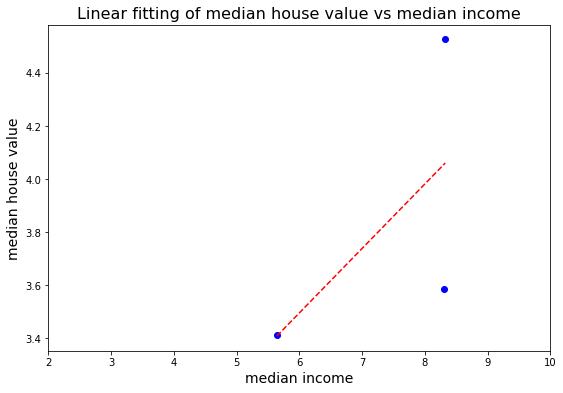

In [117]:


#A decrease# CHALLENGE 4: Now divide your dataset into train- and testset and apply any models you want
# (you can use any frameworks you want e.g sklearn, tensorflow etc)

from scipy.optimize import curve_fit
from sklearn.model_selection import train_test_split

#Our target data are is the last column representing the median house value per group block.
#We will map our data to this column with various models.

data = a.loc[0:4, 'MedInc':'Longitude']


#print(data)

data_train, data_test, col_9_train, col_9_test = train_test_split(data, col_9, test_size=2, random_state=2)

#print(data_test)

#We could map our various train columns to the train house value column through various fitting model.
#A possibility would be to fit the MedInc data to the house value data using a reserve sigmoid function.

data_MedInc = a.loc[0:4, 'MedInc']
data_MedInc = np.array([i for i in data_MedInc])
#print(data_MedInc)

data_MedInc_train, data_MedInc_test, col_9_train, col_9_test = train_test_split(data_MedInc, col_9, test_size=2, random_state=2)

print(data_MedInc_train)
print(col_9_train)

#for reference: sigmoid function:
def sigmoid(x, xhalf, base, maximum, rate):
    return base + ((maximum - base)/(1 + np.exp((xhalf-x)*(1/rate))))

def reverse_sigmoid(x):
     return (-np.log(((maximum - base)/(x - base))-1) * rate + xhalf)
    
x_half_try = (max(data_MedInc) - min(data_MedInc))/2


#A possibility would be to also use a simple linear model to fit the data.

def linear_func(x, k, d):
    return x*k + d


k_try = 1
d_try = 1
popt, pcov = curve_fit(linear_func, data_MedInc_train, col_9_train, p0 = [k_try , d_try])
x_fit = np.linspace(min(data_MedInc_train), max(data_MedInc_train), 10000)
y_fit = linear_func(x_fit, *popt)
k = popt[0]
k_error = pcov[0, 0]
print()
print("The slope of the calibration curve equals (", format(k, '.6f'),"+-",format(k_error, '.6f'),")")
d = popt[1]
d_error = pcov[1, 1]
print("My d for the calibration curve equals (", format(d, '.6f'),"+-",format(d_error, '.6f'),")")

plt.figure(figsize=(9,6))
plt.plot(data_MedInc_train, col_9_train, 'bo')
plt.plot(x_fit, y_fit, 'r--')
plt.title("Linear fitting of median house value vs median income", fontsize=16)
plt.xlabel("median income", fontsize=14)
plt.ylabel("median house value", fontsize=14)
plt.xlim(2, 10)

#More data points would be important a more accurate model and a model above linear

print(" ")
print(" ")
print(" ")
print("This following graph isn't any proper  indicator at all. It should be ignored completely!")

print(" ")
print(" ")
print(" ")
print("After having found coefficients from applying our model, we should use those to test the model on our test data.")


In [118]:
# CHALLENGE 5: Measure the results of your models and apply model selection
# Please argue why would you select one model over another

In [120]:
# CHALLENNGE 6: Write a summary report of your results, including plots and 
#discussion of your results (You can reuse the outcome/plots from above). 
#The report shall cover the following questions:
# 1. What was most interesting/surprising for you when you explored and visualized the data?
# 2. What was the biggest problem for you to complete all challenges, and how did you solve the problem?
# 3. Which model performed best, and why?
# 4. ...

#To me the most surprising aspect is the second element of the population column. The huge absolute population value despite the lowest
#average occupation and number of available bedroom number.

#Biggest problem was definitely to from Challenge 4 onwards due to my lack of hand-on training when it comes to the topic.
#Learning about TensorFlow for Machine Learing models is my current goal.